In [1]:
#Logistic Regression 
# example 1 : Simple Guess 
import math 

def sigmoid(z) :
    return 1/(1 + math.exp(-z))

hours =int(input("enter the hours you have studied : "))
z = -1.5 + 0.6 * hours 
chance = sigmoid(z)
Prediction = "Pass " if chance > 0.5 else "Fail"
print(f"Chance of Passing : {chance : 2f} (thats {chance * 100 :.0f}%)")
print(f"Prediction : {Prediction }" )


enter the hours you have studied :  4


Chance of Passing :  0.710950 (thats 71%)
Prediction : Pass 


In [3]:
from sklearn.linear_model import LogisticRegression 
import numpy as np 

hours = np.array([[2],[4],[6]])
answers = [0,1,1]
model = LogisticRegression()
model.fit(hours,answers)

print("starting point (a0):",model.intercept_[0])
print("change per hour (a1):" , model.coef_[0][0])
guesses = model.predict(hours)
print("Guesses :",guesses)

starting point (a0): -2.295231199284122
change per hour (a1): 0.8185864319243061
Guesses : [0 1 1]


In [5]:
from sklearn.metrics import confusion_matrix

real = [0,0,0,1,1,1,1,1,1,1]
guesses = [0,0,1,1,1,1,1,1,1,1]
table = confusion_matrix(real,guesses)
print("confusion table : \n",table)

confusion table : 
 [[2 1]
 [0 7]]


In [7]:
from sklearn.metrics import precision_score

precision = precision_score(real,guesses)
print("precision :",precision)


precision : 0.875


In [9]:
from sklearn.metrics import recall_score

recall = recall_score(real,guesses)
print("recall :",recall)


recall : 1.0


In [11]:
from sklearn.metrics import f1_score

f1 = f1_score(real,guesses)
print("f1 score :",f1)

f1 score : 0.9333333333333333


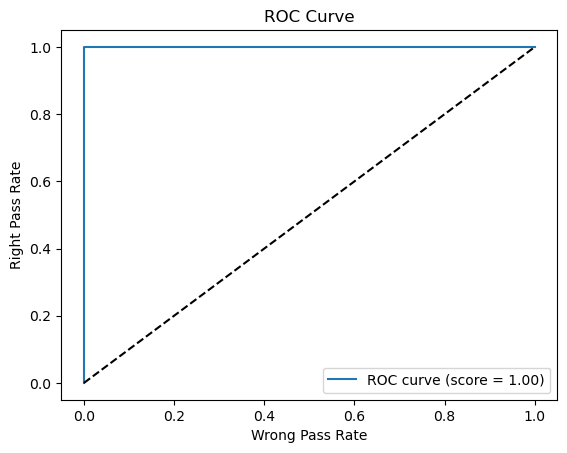

score : 1.0


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import numpy as np

hours = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
real = [0,0,1,1,1,1,1,1,1,1]
model = LogisticRegression()
model.fit(hours,real)
chances = model.predict_proba(hours)[:,1]

false_rate , true_rate,_ = roc_curve(real,chances)
area = auc(false_rate,true_rate)

plt.plot(false_rate,true_rate,label = f'ROC curve (score = {area:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Wrong Pass Rate')
plt.ylabel('Right Pass Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("score :",area)